# Quickstart

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Downloading open Datasets

training_data = datasets.FashionMNIST( root = 'G:\\00_PyTorch & FastAI\\PyTorch\\data',
                                     train = True,
                                     download = True,
                                     transform = ToTensor() )

test_data = datasets.FashionMNIST( root = 'G:\\00_PyTorch & FastAI\\PyTorch\\data',
                                 train = False,
                                 download = True,
                                 transform = ToTensor() )

In [3]:
batch_size = 64

# Create Data Loaders
train_dataloader = DataLoader(training_data, batch_size = batch_size) 
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y torch.Size([64]) torch.int64


In [4]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device.")

Using cpu device.


In [5]:
# Define model

class NeuralNet(nn.Module):
    
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential( 
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

model = NeuralNet().to(device)
print(model)    

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
# Defining LOSS & OPTIMIZER
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss = test_loss + loss_fn(pred, y).item()
            correct = correct + (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss = test_loss / num_batches
    correct = correct / size
    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
    
print("\nDone!")

Epoch 1
-------------------------------
loss: 2.304922  [    0/60000]
loss: 2.162117  [ 6400/60000]
loss: 1.760541  [12800/60000]
loss: 1.491629  [19200/60000]
loss: 1.126259  [25600/60000]
loss: 1.039877  [32000/60000]
loss: 1.001977  [38400/60000]
loss: 0.866029  [44800/60000]
loss: 0.866825  [51200/60000]
loss: 0.814886  [57600/60000]
Test Error: 
 Accuracy: 70.7%, Avg loss: 0.796396 

Epoch 2
-------------------------------
loss: 0.801208  [    0/60000]
loss: 0.859183  [ 6400/60000]
loss: 0.590544  [12800/60000]
loss: 0.792409  [19200/60000]
loss: 0.665246  [25600/60000]
loss: 0.643514  [32000/60000]
loss: 0.713928  [38400/60000]
loss: 0.686405  [44800/60000]
loss: 0.694285  [51200/60000]
loss: 0.644320  [57600/60000]
Test Error: 
 Accuracy: 77.8%, Avg loss: 0.636300 

Epoch 3
-------------------------------
loss: 0.563852  [    0/60000]
loss: 0.670929  [ 6400/60000]
loss: 0.440327  [12800/60000]
loss: 0.675509  [19200/60000]
loss: 0.585996  [25600/60000]
loss: 0.560831  [32000/600

In [13]:
# save model

torch.save(model.state_dict(), "G:\\00_PyTorch & FastAI\\PyTorch\\FashionMNIST_model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [15]:
# Load model

model = NeuralNet()
model.load_state_dict(torch.load("G:\\00_PyTorch & FastAI\\PyTorch\\FashionMNIST_model.pth"))

<All keys matched successfully>

In [16]:
# Predictions

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


# Tensors

In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype = torch.float32)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2905, 0.0820],
        [0.1786, 0.5351]]) 



In [5]:
shape = (2,3,)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9512, 0.6950, 0.8050],
        [0.4268, 0.4551, 0.9236]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
tensor = torch.rand(3,4)

print(f"Shape of Tensor: {tensor.shape} \n")
print(f"Datatype of Tensor: {tensor.dtype} \n")
print(f"Device Tensor is stored on: {tensor.device}")

Shape of Tensor: torch.Size([3, 4]) 

Datatype of Tensor: torch.float32 

Device Tensor is stored on: cpu


In [7]:
# We move our tensor to the GPU if available

if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [8]:
tensor = torch.ones(4,4)

tensor[0]

tensor([1., 1., 1., 1.])

In [9]:
tensor[:, 0]

tensor([1., 1., 1., 1.])

In [10]:
tensor[:, -1]

tensor([1., 1., 1., 1.])

In [11]:
tensor[:, 1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
t1 = torch.cat([tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
t1 = torch.cat([tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]])


In [21]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [22]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [19]:
agg = tensor.sum()
agg_item = agg.item()

print(agg_item, type(agg_item))

12.0 <class 'float'>


In [23]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [25]:
tensor.t_()

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [26]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [27]:
# Tensor to Numpy arrays

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [28]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [29]:
n = np.ones(5)
t = torch.from_numpy(n)

In [30]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Datasets & DataLoaders

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST( root = "G:\\00_PyTorch & FastAI\\PyTorch\\data",
                                     train = True,
                                     download = True,
                                     transform = ToTensor()
                                     )

test_data = datasets.FashionMNIST( root = "G:\\00_PyTorch & FastAI\\PyTorch\\data",
                                     train = False,
                                     download = True,
                                     transform = ToTensor()
                                     )

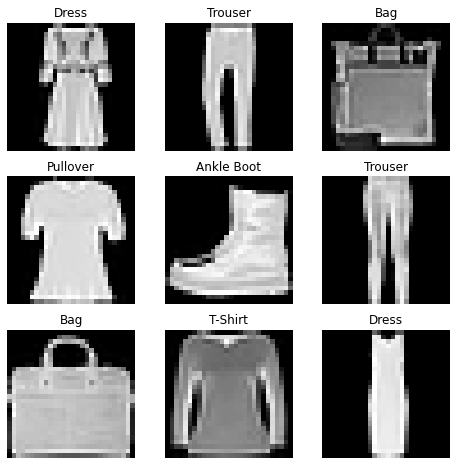

In [2]:
labels_map = { 
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))

cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()

Text(0.5, 1.0, 'T-Shirt')

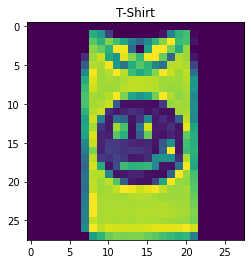

In [3]:
img, label = training_data[101]
plt.imshow(img.squeeze())
plt.title(labels_map[label])

In [4]:
# Creating a Custom Dataset for your files

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [5]:
import torchvision
torchvision.io.read_image("C:\\Users\\Nagendra.NAGENDRA\\Downloads\\cat.jpg", mode= torchvision.io.image.ImageReadMode.GRAY)

tensor([[[173, 173, 174,  ..., 168, 166, 164],
         [177, 177, 177,  ..., 168, 166, 165],
         [179, 179, 178,  ..., 168, 167, 166],
         ...,
         [ 98,  99,  98,  ...,  91,  94,  92],
         [109, 104,  98,  ...,  87,  91,  86],
         [105,  98,  90,  ...,  89,  88,  74]]], dtype=torch.uint8)

In [6]:
# Preparing your data for training with DataLoaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True) 
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True) 

Train batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


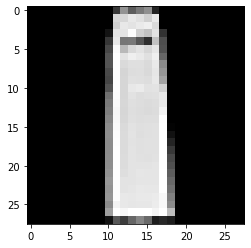

Label: Dress


In [12]:
# Iterate through the DataLoader

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Train batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {labels_map[label.item()]}")

# Transforms

In [13]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(root = 'G:\\00_PyTorch & FastAI\\PyTorch\\data',
                          train = True,
                          download = True,
                          transform = ToTensor(),
                          target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float32).scatter_(0, torch.tensor(y), value=1))
                         )


In [14]:
torch.zeros(5, dtype=torch.float).scatter_(0, torch.tensor(3), value=1)

tensor([0., 0., 0., 1., 0.])

In [17]:
torch.zeros(5, dtype=torch.float).scatter_(0, torch.tensor(3), 1)

tensor([0., 0., 0., 1., 0.])

# Build the Neural Network

In [18]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [22]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [23]:
X = torch.rand(1,28,28, device=device)
logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted Class: {y_pred}")

Predicted Class: tensor([1])


In [24]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [25]:
flatten = nn.Flatten()
flat_image = flatten(input_image)

print(f"Flat image size: {flat_image.size()}")

Flat image size: torch.Size([3, 784])


In [27]:
layer1 = nn.Linear(in_features = 28*28, out_features = 20)
hidden1 = layer1(flat_image)

print(f"{hidden1.size()}")

torch.Size([3, 20])


In [28]:
print(f"Before ReLU: {hidden1} \n\n")
hidden1 =nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3842,  0.1771,  0.0697, -0.5304, -0.3646, -0.0666, -0.0762,  0.2758,
          0.8138, -0.1521,  0.2493,  0.2893, -0.5112, -0.2202,  0.5024, -0.1550,
          0.0510, -0.0016, -0.1854, -0.1344],
        [ 0.2252, -0.0057, -0.0327, -0.3983, -0.2579, -0.0787, -0.3225,  0.1913,
          0.5187,  0.4025,  0.1984,  0.4030, -0.2518, -0.1019,  0.2126, -0.1858,
         -0.2120, -0.0968, -0.0892, -0.2446],
        [ 0.2035, -0.0386, -0.0600, -0.3140, -0.4172, -0.4250, -0.0102,  0.1532,
          0.4545, -0.1264,  0.3357,  0.2629, -0.7445, -0.2343,  0.2864, -0.2789,
         -0.2167, -0.1842, -0.0140, -0.3360]], grad_fn=<AddmmBackward0>) 


After ReLU: tensor([[0.3842, 0.1771, 0.0697, 0.0000, 0.0000, 0.0000, 0.0000, 0.2758, 0.8138,
         0.0000, 0.2493, 0.2893, 0.0000, 0.0000, 0.5024, 0.0000, 0.0510, 0.0000,
         0.0000, 0.0000],
        [0.2252, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1913, 0.5187,
         0.4025, 0.1984, 0.4030, 0.0000, 0.0000, 0.2

In [29]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [33]:
softmax = nn.Softmax(dim=1)
pred_prbab = softmax(logits)

In [34]:
print(f"Model Structure: {model} \n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-1.6410e-02, -3.3851e-02,  1.9320e-02,  ...,  3.1226e-02,
          2.3546e-02, -3.2419e-02],
        [-2.4891e-02,  3.0946e-03,  1.3534e-02,  ..., -6.0979e-04,
         -9.8816e-03,  3.3312e-05]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0301, -0.0062], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 1.3005e-02,  2.9696e-02,  2.9156e-02,  ..., -3.1827e-03,
         -3.8572e-02, -3.8852e-02],
        [ 4.0782e-02, -8.2074e-03,  1.0768e-03,  .

# Autograd

In [2]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.rand(5, 3, requires_grad = True)
b = torch.rand(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

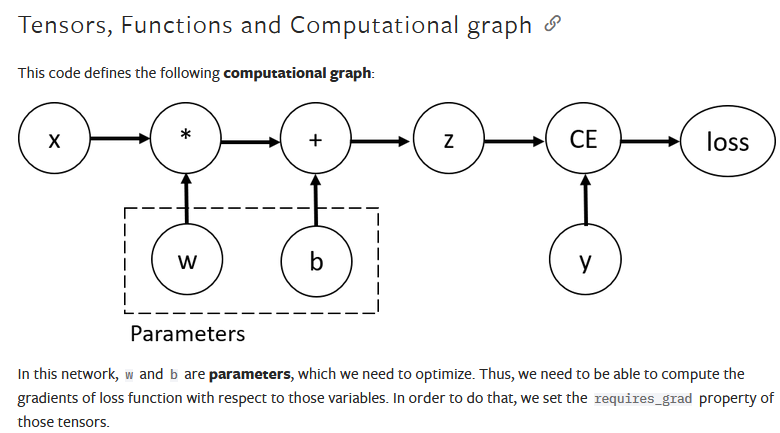

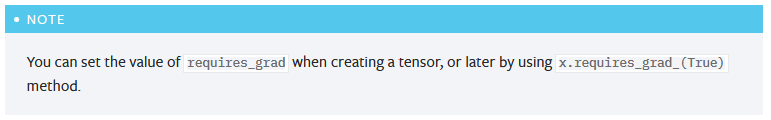

In [3]:
print(f"Gradient function for z: {z.grad_fn}")
print(f"Gradient function for loss: {loss.grad_fn}")

Gradient function for z: <AddBackward0 object at 0x00000186117E0D90>
Gradient function for loss: <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000186129D8D60>


In [4]:
loss.backward()

print(w.grad)
print(b.grad)

tensor([[0.3283, 0.3068, 0.3207],
        [0.3283, 0.3068, 0.3207],
        [0.3283, 0.3068, 0.3207],
        [0.3283, 0.3068, 0.3207],
        [0.3283, 0.3068, 0.3207]])
tensor([0.3283, 0.3068, 0.3207])


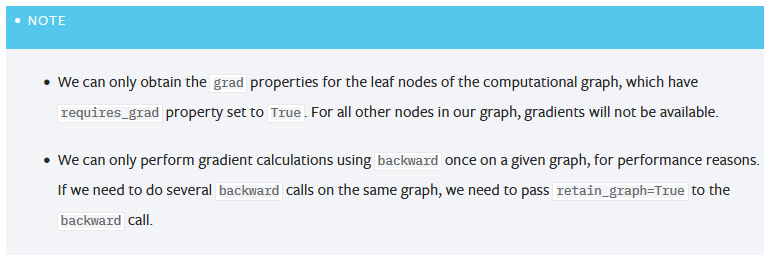

In [5]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b

print(z.requires_grad)

True
False


In [7]:
# Another way to achieve the same result is to use the detach() method on the tensor

z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


In [8]:
inp = torch.eye(5, requires_grad = True)
out = (inp + 1).pow(2)
out.backward(torch.ones_like(inp), retain_graph = True)
print(f"First Call: \n {inp.grad}")
out.backward(torch.ones_like(inp), retain_graph = True)
print(f"Second Call: \n {inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph = True)
print(f"Call after Zeroing gradients: \n {inp.grad}")

First Call: 
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])
Second Call: 
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])
Call after Zeroing gradients: 
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Optimizing Model Parameters

In [10]:
# Prerequisite Code

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda


training_data = datasets.FashionMNIST(root = 'G:\\00_PyTorch & FastAI\\PyTorch\\data',
                                      train = True,
                                      download = True,
                                      transform = ToTensor()
                                     )

test_data = datasets.FashionMNIST(root = 'G:\\00_PyTorch & FastAI\\PyTorch\\data',
                                  train = False,
                                  download = True,
                                  transform = ToTensor()
                                 )

train_dataloader = DataLoader(training_data, batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28*28, 512),
                                               nn.ReLU(),
                                               nn.Linear(512, 512),
                                               nn.ReLU(),
                                               nn.Linear(512, 10),
                                              )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork()

In [11]:
# Hyperparameters

learning_rate = 1e-2
batch_size = 64
epochs = 5

In [12]:
# Initialize the loss function

loss_fn = nn.CrossEntropyLoss()

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [21]:
# Full implementation

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}|{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss = test_loss + loss_fn(pred, y).item()
            correct = correct + (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss = test_loss / num_batches
    correct = correct/size
    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [16]:
len(test_dataloader.dataset)

10000

In [18]:
len(train_dataloader)

938

In [19]:
938*64

60032

In [22]:
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1} \n ------------------------- ")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1 
 ------------------------- 
loss: 2.291653 [    0|60000]
loss: 2.173626 [ 6400|60000]
loss: 1.829294 [12800|60000]
loss: 1.526811 [19200|60000]
loss: 1.175309 [25600|60000]
loss: 1.051429 [32000|60000]
loss: 1.005274 [38400|60000]
loss: 0.877789 [44800|60000]
loss: 0.873783 [51200|60000]
loss: 0.824168 [57600|60000]
Test Error: 
 Accuracy: 71.5%, Avg loss: 0.800481

Epoch 2 
 ------------------------- 
loss: 0.798373 [    0|60000]
loss: 0.860771 [ 6400|60000]
loss: 0.599307 [12800|60000]
loss: 0.782846 [19200|60000]
loss: 0.663179 [25600|60000]
loss: 0.628183 [32000|60000]
loss: 0.705913 [38400|60000]
loss: 0.683259 [44800|60000]
loss: 0.699458 [51200|60000]
loss: 0.643782 [57600|60000]
Test Error: 
 Accuracy: 77.9%, Avg loss: 0.636524

Epoch 3 
 ------------------------- 
loss: 0.559398 [    0|60000]
loss: 0.662684 [ 6400|60000]
loss: 0.445734 [12800|60000]
loss: 0.660551 [19200|60000]
loss: 0.581518 [25600|60000]
loss: 0.547902 [32000|60000]
loss: 0.583329 [38400|60000]
loss

# Save and Load the Model

In [23]:
import torch
import torchvision.models as models

In [24]:
model = models.vgg16(pretrained = True)
torch.save(model.state_dict(), 'G:\\00_PyTorch & FastAI\\PyTorch\\Saved Models\\model_weights.pth')

c:\users\nagendra.nagendra\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\users\nagendra.nagendra\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Nagendra.NAGENDRA/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [26]:
model = models.vgg16() # we don't specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load("G:\\00_PyTorch & FastAI\\PyTorch\\Saved Models\\model_weights.pth"))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [27]:
torch.save(model, 'model.pth')

In [28]:
model = torch.load('model.pth')